<hr style="width:100%;height:1px">
<table style="width:100%">
  <tr style="background-color:rgb(255,255,255)">
    <th style="width:25%">
    <img src="iut.png" alt="دانشگاه صنعتی اصفهان" style="width:120px;height:120px;">
    </th>
    <th style="width:75%">
    <p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:12pt">
    .::به نام خداوند بخشنده و بخشایشگر مهربان::.
    </p>
    <p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:12pt">
    تمرین رایانه‌ای دوم درس شبکه عصبی - دانشگاه صنعتی اصفهان - نیم سال اول تحصیلی سال ۹۷-۱۳۹۸
    </p>
    <p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:12pt">
    بخش دوم: پیدا سازی یک شبکه بازگشتی
    </p>
    </th>
  </tr>
</table>

<hr style="width:100%;height:1px">

<p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:14pt">
در این تمرین می‌خواهیم یک مسأله دسته بندی را حل نماییم. حتما فایل توضیحات همراه این نوت‌بوک را مطالعه نمایید و مراحل مورد نیاز را در این فایل پیاده سازی نمایید.
</p>

In [1]:
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPool2D, Deconv2D, BatchNormalization, Input, Dropout, Flatten, LSTM, TimeDistributed
from keras.models import Model
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt, cm

Using TensorFlow backend.


<p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:14pt">
ابتدا پایگاه داده متشکل از ۱۰۰۰ تصویر شامل اعداد ۴ رقمی ایجاد می‌شود.
</p>

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
idx = np.random.randint(0, x_train.shape[0], size=(1000,4))
X = np.zeros((1000, 28, 112, 1))
Y = np.zeros((1000, 4))
Ystr = []
nonzeroidx = np.where(y_train != 0)[0]
l0 = len(nonzeroidx)

for j in range(1000):
    if y_train[idx[j, 0]] != 0:
        x = [x_train[i] for i in idx[j]]
        y = [y_train[i] for i in idx[j]]
    else:
        idx[j ,0] = nonzeroidx[np.random.randint(l0)]
        x = [x_train[i] for i in idx[j]]
        y = [y_train[i] for i in idx[j]]
    v = np.hstack(x)
    X[j, :, :, 0] = v / 255.0
    Y[j] = y
    y = [str(i) for i in y]
    Ystr.append(''.join(y))

In [4]:
X = X;
Y = Ystr;

<p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:14pt">
در شکل زیر یک نمونه از تصاویر ایجاد شده و برچسب متنی آن نشان داده شده است. دقت کنید که این برچسب برای شبکه قابل فهم نیست. مطابق معماری‌ای که برای شبکه درنظر می‌گیرید سعی کنید برچسب مناسب را ایجاد نمایید.
</p>

'3681'

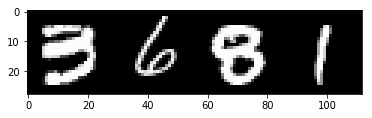

In [5]:
plt.imshow(X[100, :, :, 0], cm.gray);
Y[100]

In [ ]:
# create usefull label data
## --- write your code here ---- #

<p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:14pt">
این هزار داده را در دو دسته آموزشی و آزمون با نسبت ۷۰ به ۳۰ تقسیم کنید.
</p>

In [ ]:
# split train and test data:
## ---- write your code here ---- #

<p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:14pt">
حال یک شبکه کانولوشنی مناسب برای داده‌ها طراحی کنید. و اسم آن شبکه را 
modelrnn 
بگذارید.
</p>

In [ ]:
# create a CNN model and name it modelcnn:
## ---- write your code here ---- ##

<p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:14pt">
حال با کامل کردن کد زیر مدل را کامپایل نمایید.
</p>

In [ ]:
modelrnn.compile(loss= , optimizer= , metrics=['acc'])

<p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:14pt">
کد زیر را کامل کنید و مدل را آموزش دهید.
</p>

In [ ]:
hist = modelrnn.fit(, , epochs=, validation_data=(, ), verbose=1)

<p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:14pt">
قطعه کد زیر دقت خروجی شبکه را در ایپاک‌های مختلف و روی داده‌های آموزش و آزمون نشان می‌دهد. با استفاده از نمودار بررسی کنید که آیا شبکه به درستی آموزش داده شده است یا خیر.
</p>

In [ ]:
keys = hist.history.keys()
l = []
plt.figure(figsize=(17, 10))
for key in keys:
    if key[-1] != 's':
        plt.plot(hist.history[key])
        l.append(key)
plt.grid()
plt.legend(l)
plt.title('accuracy for train and test over 100 epoches')
plt.xlabel('# epochs');

<p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:14pt">
سعی کنید دقت خروجی شبکه را در قالب درصد گزارش کنید.
</p>

In [ ]:
# ---- write code  here-----#

<p style="direction:rtl;text-align:right;font-family:'B Mitra';font-size:14pt">
دو سلول پایین شمایی گرافیکی از شبکه‌ای را که طراحی کرده‌اید را ایجاد خواهد کرد. این دستورات را بخاطر بسپارید و در پروژه نهایی خود پیاده سازی کنید.
</p>

In [ ]:
from keras.utils import plot_model
plot_model(modelrnn, to_file='modelrnn.png')

![modelrnn](modelrnn.png)